# Classify the Size_Categorie using SVM

* month	month of the year: 'jan' to 'dec'
* day	day of the week: 'mon' to 'sun'
* FFMC	FFMC index from the FWI system: 18.7 to 96.20
* DMC	DMC index from the FWI system: 1.1 to 291.3
* DC	DC index from the FWI system: 7.9 to 860.6
* ISI	ISI index from the FWI system: 0.0 to 56.10
* temp	temperature in Celsius degrees: 2.2 to 33.30
* RH	relative humidity in %: 15.0 to 100
* wind	wind speed in km/h: 0.40 to 9.40
* rain	outside rain in mm/m2 : 0.0 to 6.4
* Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
forestfires=pd.read_csv("F:/ExcelR workings/Assignments/Support Vector Machines/forestfires.csv")

In [3]:
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualization using different plot and comparisons

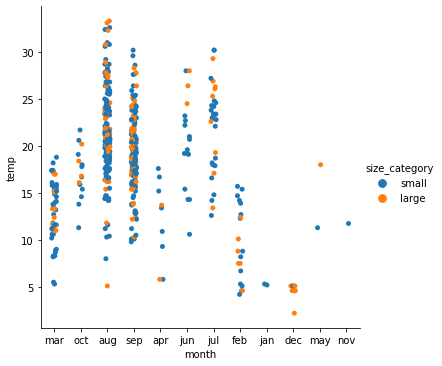

In [20]:
sns.catplot(x="month", y="temp", hue="size_category", data=forestfires)

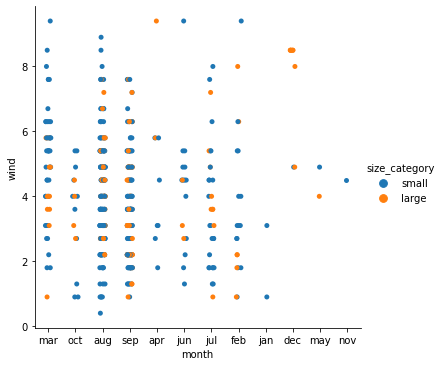

In [21]:
sns.catplot(x="month", y="wind", hue="size_category", data=forestfires)

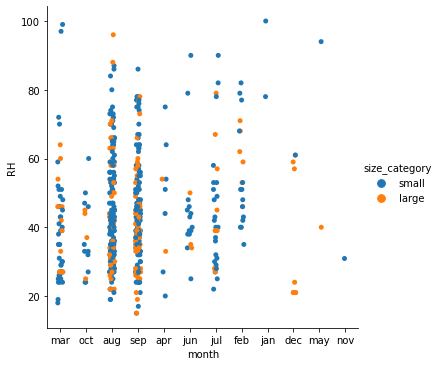

In [23]:
sns.catplot(x="month", y="RH", hue="size_category", data=forestfires)

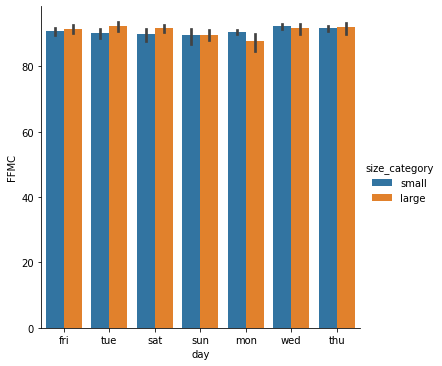

In [8]:
sns.catplot(x="day", y="FFMC", hue="size_category", kind="bar", data=forestfires)

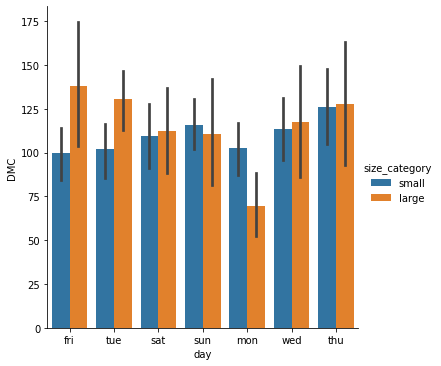

In [9]:
sns.catplot(x="day", y="DMC", hue="size_category", kind="bar", data=forestfires)

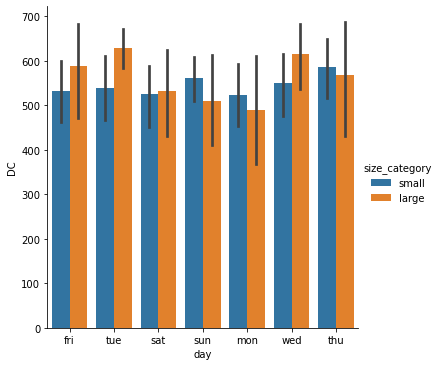

In [10]:
sns.catplot(x="day", y="DC", hue="size_category", kind="bar", data=forestfires)

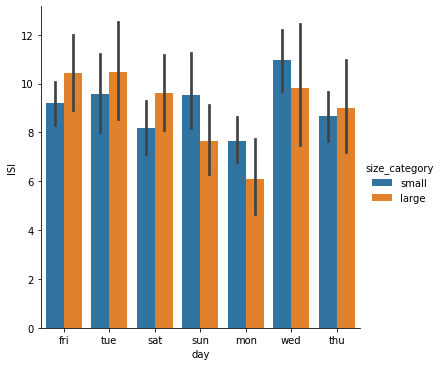

In [11]:
sns.catplot(x="day", y="ISI", hue="size_category", kind="bar", data=forestfires)

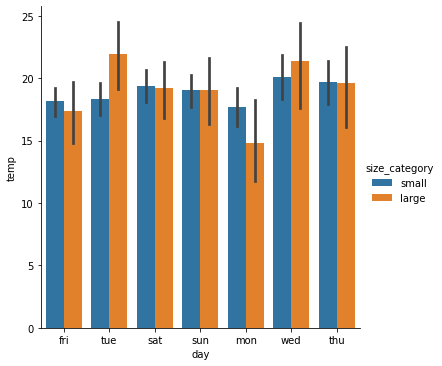

In [12]:
sns.catplot(x="day", y="temp", hue="size_category", kind="bar", data=forestfires)

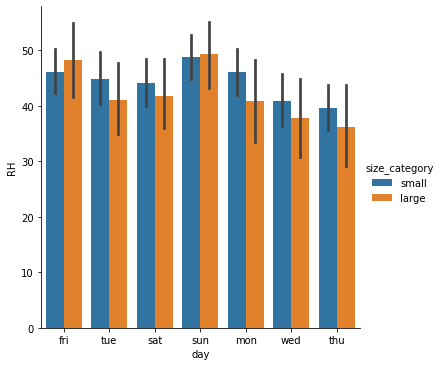

In [13]:
sns.catplot(x="day", y="RH", hue="size_category", kind="bar", data=forestfires)

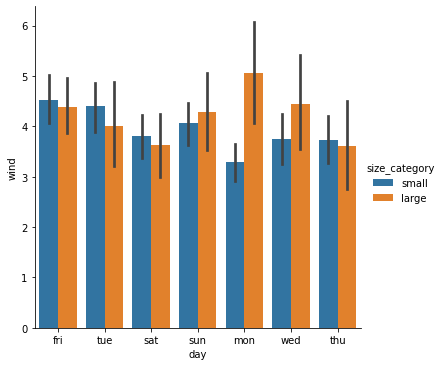

In [14]:
sns.catplot(x="day", y="wind", hue="size_category", kind="bar", data=forestfires)

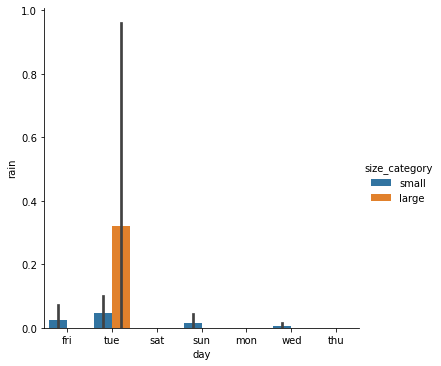

In [15]:
sns.catplot(x="day", y="rain", hue="size_category", kind="bar", data=forestfires)

C:\Users\sanjaysagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

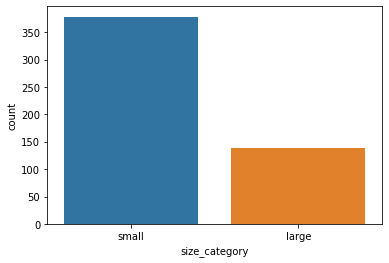

In [26]:
sns.countplot('size_category', data= forestfires)

In [27]:
##Dropping the month and day columns
forestfires.drop(["month","day"],axis=1,inplace =True)

In [28]:
x = forestfires.iloc[:,:-1]
y = forestfires.iloc[:,-1]

### Normalising the data as there is scale difference

In [29]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
x_n=norm_func(x)

### Splitting the data into train and test data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_n, y, test_size = 0.25, random_state=30)

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((387, 28), (387,), (130, 28), (130,))

# Grid search

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
clf = SVC()  
param_grid = [{'kernel':['rbf'],'gamma':[20,15,10,5,1,0.5],'C':[2,1,0.5,0.2,0.1]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)
print(gsv.best_params_)
print(gsv.best_score_ )

{'C': 1, 'gamma': 20, 'kernel': 'rbf'}
0.7571524966261809


In [35]:
clf = SVC()
param_grid1 = [{'kernel':['poly'],'gamma':[20,15,10,5,1,0.5],'C':[1,0.5,0.2,0.1]}]
gsv1 = GridSearchCV(clf,param_grid1,cv=10)
gsv1.fit(x_train,y_train)
print(gsv1.best_params_)
print(gsv1.best_score_ )

{'C': 1, 'gamma': 15, 'kernel': 'poly'}
0.8576923076923076


# Building a Model

In [36]:
model=SVC(C=0.3, gamma=20, kernel='rbf') 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy = ",acc)

Accuracy =  0.7307692307692307


In [37]:
#Build a model
model1=SVC(kernel='poly',C=0.2,gamma=15)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy = ", acc)

Accuracy =  0.8461538461538461
